In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


## Import Libraries

In [292]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

### Reading data from CSV file

In [294]:
iris=pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Data Analysis

#### Check data features and Dimensions

In [295]:
iris.shape

(150, 5)

#### The dataset consists of 150 rows (flowers), with 5 features each

In [296]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [297]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [298]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Checking for null values

In [299]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [300]:
iris.head(150)

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


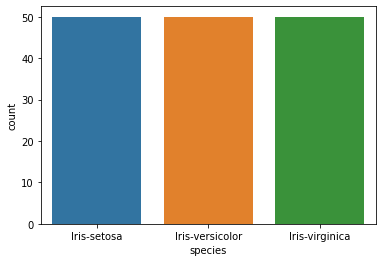

In [301]:
ax=sns.countplot(iris["species"])
target_temp0 = iris.species.value_counts()
print(target_temp0)

5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
6.2     4
5.2     4
7.7     4
6.9     4
4.6     4
7.2     3
5.9     3
4.4     3
6.8     3
6.6     2
4.7     2
7.1     1
7.4     1
7.6     1
7.9     1
4.5     1
7.0     1
5.3     1
7.3     1
4.3     1
Name: sepal_length, dtype: int64


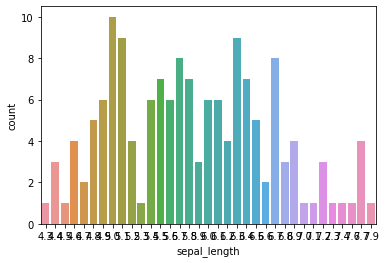

In [302]:
ax=sns.countplot(iris["sepal_length"])
target_temp = iris.sepal_length.value_counts()
print(target_temp)

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.8     6
3.5     6
3.3     6
2.6     5
2.3     4
2.2     3
2.4     3
3.6     3
3.7     3
3.9     2
4.4     1
2.0     1
4.0     1
4.2     1
4.1     1
Name: sepal_width, dtype: int64


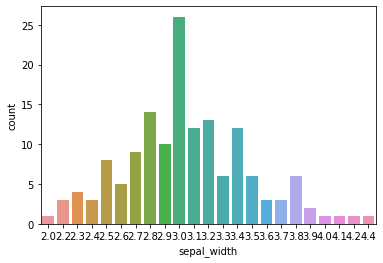

In [303]:
ax=sns.countplot(iris["sepal_width"])
target_temp1 = iris.sepal_width.value_counts()
print(target_temp1)

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.0     5
4.9     5
4.7     5
5.0     4
1.7     4
4.8     4
4.4     4
4.2     4
4.1     3
5.7     3
5.5     3
6.1     3
3.9     3
4.6     3
5.8     3
5.2     2
1.9     2
6.0     2
1.2     2
4.3     2
5.3     2
5.4     2
3.3     2
6.7     2
3.5     2
5.9     2
3.6     1
3.8     1
1.0     1
3.0     1
6.3     1
6.6     1
3.7     1
1.1     1
6.4     1
6.9     1
Name: petal_length, dtype: int64


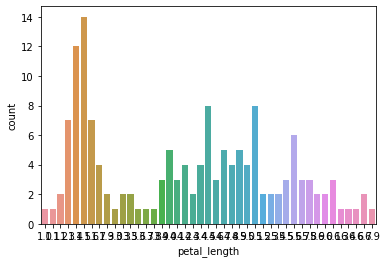

In [304]:
ax=sns.countplot(iris["petal_length"])
target_temp2 = iris.petal_length.value_counts()
print(target_temp2)

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
1.1     3
2.4     3
1.7     2
0.5     1
0.6     1
Name: petal_width, dtype: int64


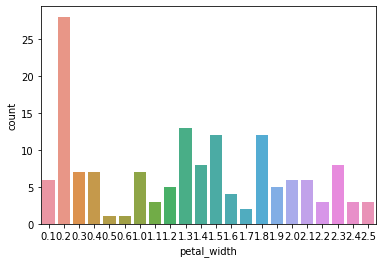

In [305]:
ax=sns.countplot(iris["petal_width"])
target_temp3 = iris.petal_width.value_counts()
print(target_temp3)

#### Analysis of each features

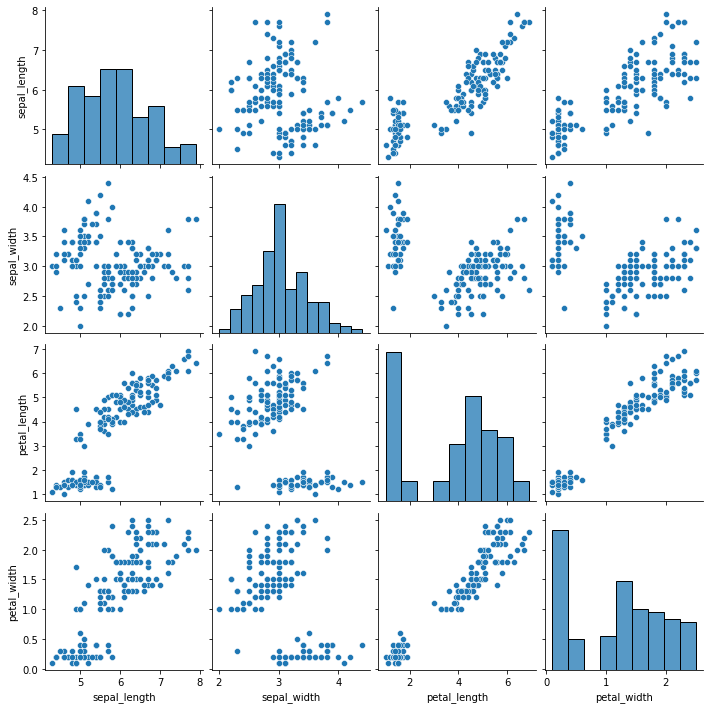

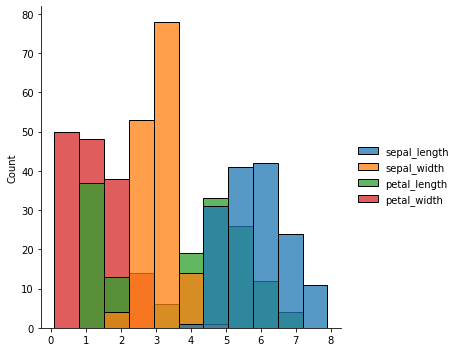

In [306]:

# Basic correlogram
sns.pairplot(iris)
sns.displot(iris)

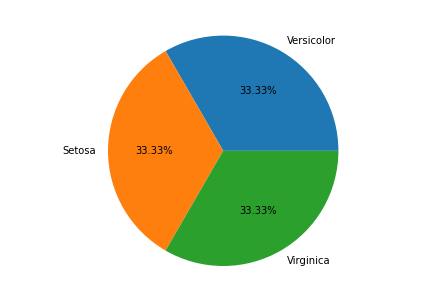

In [307]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

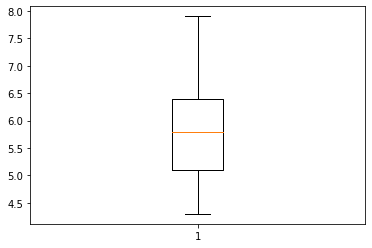

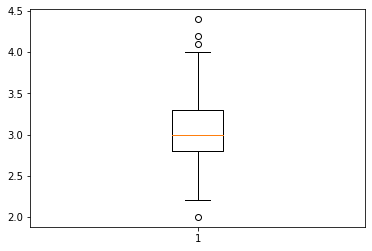

In [308]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['sepal_length']])
plt.figure(2)
plt.boxplot([iris['sepal_width']])
plt.show()

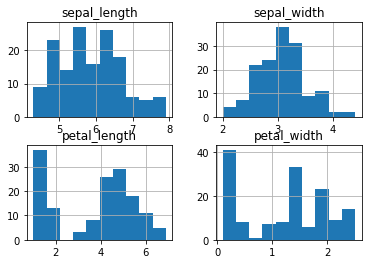

In [309]:
iris.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

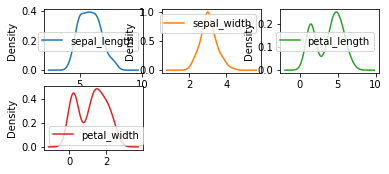

In [310]:
iris.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

sepal_length       AxesSubplot(0.125,0.536818;0.133621x0.343182)
sepal_width     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
petal_length     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
petal_width     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

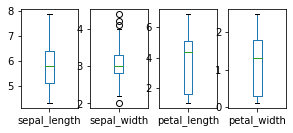

In [311]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

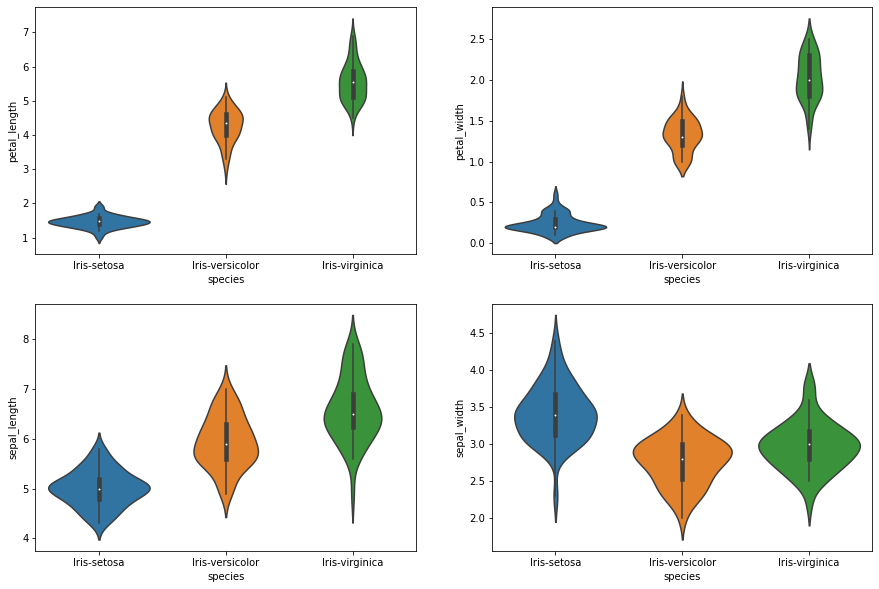

In [312]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

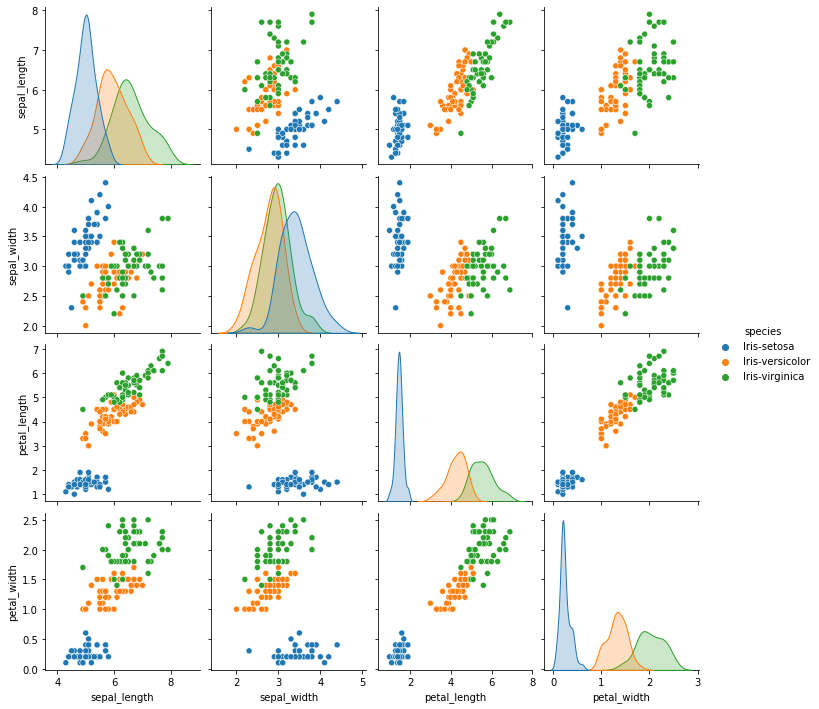

In [313]:
sns.pairplot(iris,hue='species');

### Heatmap

In [314]:
# store numeric variables in cnames
cnames=['sepal_length','sepal_width','petal_length', 'petal_width']

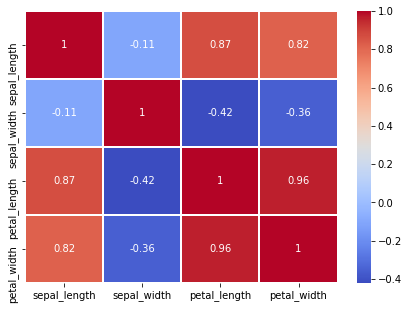

In [315]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = iris.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [316]:
X = iris['sepal_length'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [317]:
Y = iris['sepal_width'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

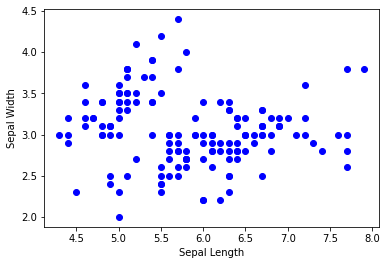

In [318]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [319]:
P = iris['petal_length'].values.reshape(-1,1)
print(P)

[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]
 [1.7]
 [1.4]
 [1.5]
 [1.4]
 [1.5]
 [1.5]
 [1.6]
 [1.4]
 [1.1]
 [1.2]
 [1.5]
 [1.3]
 [1.4]
 [1.7]
 [1.5]
 [1.7]
 [1.5]
 [1. ]
 [1.7]
 [1.9]
 [1.6]
 [1.6]
 [1.5]
 [1.4]
 [1.6]
 [1.6]
 [1.5]
 [1.5]
 [1.4]
 [1.5]
 [1.2]
 [1.3]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.6]
 [1.9]
 [1.4]
 [1.6]
 [1.4]
 [1.5]
 [1.4]
 [4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]
 [4.5]
 [4.7]
 [3.3]
 [4.6]
 [3.9]
 [3.5]
 [4.2]
 [4. ]
 [4.7]
 [3.6]
 [4.4]
 [4.5]
 [4.1]
 [4.5]
 [3.9]
 [4.8]
 [4. ]
 [4.9]
 [4.7]
 [4.3]
 [4.4]
 [4.8]
 [5. ]
 [4.5]
 [3.5]
 [3.8]
 [3.7]
 [3.9]
 [5.1]
 [4.5]
 [4.5]
 [4.7]
 [4.4]
 [4.1]
 [4. ]
 [4.4]
 [4.6]
 [4. ]
 [3.3]
 [4.2]
 [4.2]
 [4.2]
 [4.3]
 [3. ]
 [4.1]
 [6. ]
 [5.1]
 [5.9]
 [5.6]
 [5.8]
 [6.6]
 [4.5]
 [6.3]
 [5.8]
 [6.1]
 [5.1]
 [5.3]
 [5.5]
 [5. ]
 [5.1]
 [5.3]
 [5.5]
 [6.7]
 [6.9]
 [5. ]
 [5.7]
 [4.9]
 [6.7]
 [4.9]
 [5.7]
 [6. ]
 [4.8]
 [4.9]
 [5.6]
 [5.8]
 [6.1]
 [6.4]
 [5.6]
 [5.1]
 [5.6]
 [6.1]
 [5.6]
 [5.5]
 [4.8]
 [5.4]
 [5.6]
 [5.1]
 [5.1]

In [320]:
Q = iris['petal_width'].values.reshape(-1,1)
print(Q)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

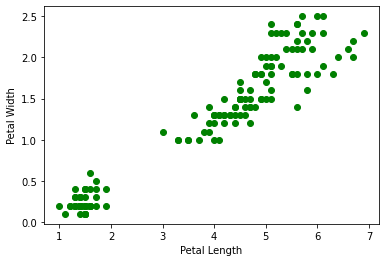

In [321]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(P,Q,color='g')
plt.show()

## Machine learning algorithms

#### Dividing the data into Training, Testing sets

#### Logistic regression

In [322]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)


(112, 5)
(38, 5)


In [323]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = test.species

In [324]:
train_X.head()

sepal_length  sepal_width  petal_length  petal_width
5             5.4          3.9           1.7          0.4
65            6.7          3.1           4.4          1.4
10            5.4          3.7           1.5          0.2
122           7.7          2.8           6.7          2.0
137           6.4          3.1           5.5          1.8

In [325]:
test_y.head()

48        Iris-setosa
144    Iris-virginica
117    Iris-virginica
100    Iris-virginica
106    Iris-virginica
Name: species, dtype: object

In [326]:
print("X_train shape: {}".format(train_X.shape))
print("y_train shape: {}".format(train_y.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [327]:

print("X_test shape: {}".format(test_X.shape))
print("y_test shape: {}".format(test_y.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [328]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [329]:

logreg001 = LogisticRegression(C=0.4).fit(train_X, train_y)
print("Training set accuracy: {:.3f}".format(logreg001.score(train_X, train_y)))
print("Test set accuracy: {:.3f}".format(logreg001.score(test_X, test_y)))

Training set accuracy: 0.946
Test set accuracy: 0.947


In [330]:
logreg100 = LogisticRegression(C=1).fit(train_X, train_y)
print("Training set accuracy: {:.3f}".format(logreg100.score(train_X, train_y)))
print("Test set accuracy: {:.3f}".format(logreg100.score(test_X, test_y)))

Training set accuracy: 0.955
Test set accuracy: 0.947


### K-Nearest Neighbors

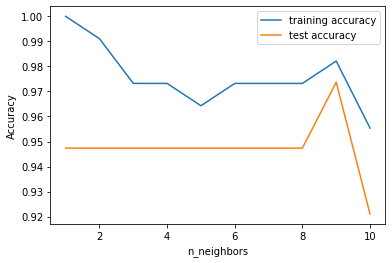

In [331]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X, train_y)
    # record training set accuracy
    training_accuracy.append(knn.score(train_X, train_y))
    # record test set accuracy
    test_accuracy.append(knn.score(test_X, test_y))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [332]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X, train_y)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(train_X, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(test_X, test_y)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.95


### Decision Tree

In [333]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_X, train_y)
print("Accuracy on training set: {:.3f}".format(tree.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(tree.score(test_X, test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


#### Here the accuracy rate on the training set is 100% that means overfitting. Therefore, apply the pre-pruning.

In [334]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_X, train_y)

print("Accuracy on training set: {:.3f}".format(tree.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(tree.score(test_X, test_y)))

Accuracy on training set: 0.991
Accuracy on test set: 0.947


#### Random Forest

In [335]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(train_X, train_y)
print("Accuracy on training set: {:.3f}".format(rf.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(rf.score(test_X, test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.921


In [336]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(train_X, train_y)
print("Accuracy on training set: {:.3f}".format(rf1.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(rf1.score(test_X, test_y)))

Accuracy on training set: 0.964
Accuracy on test set: 0.947


### Gradient Boosting

In [337]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(train_X, train_y)

print("Accuracy on training set: {:.3f}".format(gb.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(gb.score(test_X, test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947


In [338]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(train_X, train_y)

print("Accuracy on training set: {:.3f}".format(gb1.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(gb1.score(test_X, test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947


In [339]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(train_X, train_y)

print("Accuracy on training set: {:.3f}".format(gb2.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(gb2.score(test_X, test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.921


### Support Vector Machine

In [340]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_X, train_y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_y)))

Accuracy on training set: 0.96
Accuracy on test set: 0.97


#### Here we got 95% accuracy on the test data

### Gaussian Naive Bayes

In [341]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_X, train_y)

y_pred_nb = model.predict(test_X)
print(y_pred_nb)

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [342]:
score_nb = round(accuracy_score(y_pred_nb,test_y)*100,2)

print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score using Naive Bayes is: 94.74 %


<AxesSubplot:>

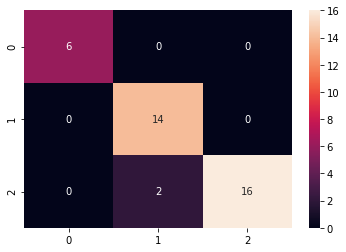

In [343]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(test_y, y_pred_nb)

sns.heatmap(matrix,annot = True, fmt = "d")

### Neural Networks

In [344]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(train_X, train_y)

print("Accuracy on training set: {:.2f}".format(mlp.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(mlp.score(test_X, test_y)))

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [345]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.fit_transform(test_X)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, train_y)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, train_y)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, test_y)))

Accuracy on training set: 0.955
Accuracy on test set: 0.737


In [346]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, train_y)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, train_y)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, test_y)))

Accuracy on training set: 0.991
Accuracy on test set: 0.737


In [352]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','K-nearest Neighbour','Decision Tree' ,'Random Forest', 'Gradient Boost', 'Support Vector Machine', 'Gaussian Naive Bayes', 'Neural Networks'],
    'Score': [0.94,0.95,0.947,0.947,0.947,0.97,0.921,0.97]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(11)

Model
Score                        
0.970  Support Vector Machine
0.970         Neural Networks
0.950     K-nearest Neighbour
0.947           Decision Tree
0.947           Random Forest
0.947          Gradient Boost
0.940     Logistic Regression
0.921    Gaussian Naive Bayes